Step 1 - Data Acquisition

Implementation of Page views API

In [19]:
# This code is based on the example notebook by Dr. David W. McDonald
import json, time, urllib.parse
import pandas as pd
import json

In [3]:
import requests

In [1]:
# The REST API 'pageviews' URL - this is the common URL/endpoint for all 'pageviews' API requests
API_REQUEST_PAGEVIEWS_ENDPOINT = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'

# This is a parameterized string that specifies what kind of pageviews request we are going to make
# In this case it will be a 'per-article' based request. The string is a format string so that we can
# replace each parameter with an appropriate value before making the request
API_REQUEST_PER_ARTICLE_PARAMS = 'per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}'

# The Pageviews API asks that we not exceed 100 requests per second, we add a small delay to each request
API_LATENCY_ASSUMED = 0.002       # Assuming roughly 2ms latency on the API and network
API_THROTTLE_WAIT = (1.0/100.0)-API_LATENCY_ASSUMED

# When making a request to the Wikimedia API they ask that you include your email address which will allow them
# to contact you if something happens - such as - your code exceeding rate limits - or some other error
REQUEST_HEADERS = {
    'User-Agent': '<uwnetid@uw.edu>, University of Washington, MSDS DATA 512 - AUTUMN 2023',
}


In [10]:
#convert excel values to list
df = pd.read_excel('thank_the_academy.AUG.2023.csv.xlsx', sheet_name='thank_the_academy.AUG.2023b.csv')
column_values = df['name'].astype(str).tolist()
ARTICLE_TITLES = []
for i in column_values:
  ARTICLE_TITLES.append(i)

In [56]:
# This template is used to map parameter values into the API_REQUST_PER_ARTICLE_PARAMS portion of an API request. The dictionary has a
# field/key for each of the required parameters. In the example, below, we only vary the article name, so the majority of the fields
# can stay constant for each request. Of course, these values *could* be changed if necessary.
ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "desktop",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015070100",
    "end":         "2023100100"
}

In [57]:
#########
#
#    PROCEDURES/FUNCTIONS
#

def request_pageviews_per_article(article_title = None,
                                  endpoint_url = API_REQUEST_PAGEVIEWS_ENDPOINT,
                                  endpoint_params = API_REQUEST_PER_ARTICLE_PARAMS,
                                  request_template = ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE,
                                  headers = REQUEST_HEADERS):

    # article title can be as a parameter to the call or in the request_template
    if article_title:
        request_template['article'] = article_title

    if not request_template['article']:
        raise Exception("Must supply an article title to make a pageviews request.")

    # Titles are supposed to have spaces replaced with "_" and be URL encoded
    article_title_encoded = urllib.parse.quote(request_template['article'].replace(' ','_'), safe = '')
    request_template['article'] = article_title_encoded

    # now, create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url+endpoint_params.format(**request_template)

    # make the request
    try:
        # we'll wait first, to make sure we don't exceed the limit in the situation where an exception
        # occurs during the request processing - throttling is always a good practice with a free
        # data source like Wikipedia - or other community sources
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response

In [58]:
print("Getting pageview data for: ",ARTICLE_TITLES[2])
views = request_pageviews_per_article(ARTICLE_TITLES[2])

Getting pageview data for:  The Whale (2022 film)


In [59]:
#print(json.dumps(views,indent=4))
print("Have %d months of pageview data"%(len(views['items'])))
for month in views['items']:
    print(json.dumps(month,indent=4))

Have 15 months of pageview data
{
    "project": "en.wikipedia",
    "article": "The_Whale_(2022_film)",
    "granularity": "monthly",
    "timestamp": "2022070100",
    "access": "desktop",
    "agent": "user",
    "views": 28302
}
{
    "project": "en.wikipedia",
    "article": "The_Whale_(2022_film)",
    "granularity": "monthly",
    "timestamp": "2022080100",
    "access": "desktop",
    "agent": "user",
    "views": 41066
}
{
    "project": "en.wikipedia",
    "article": "The_Whale_(2022_film)",
    "granularity": "monthly",
    "timestamp": "2022090100",
    "access": "desktop",
    "agent": "user",
    "views": 390423
}
{
    "project": "en.wikipedia",
    "article": "The_Whale_(2022_film)",
    "granularity": "monthly",
    "timestamp": "2022100100",
    "access": "desktop",
    "agent": "user",
    "views": 78216
}
{
    "project": "en.wikipedia",
    "article": "The_Whale_(2022_film)",
    "granularity": "monthly",
    "timestamp": "2022110100",
    "access": "desktop",
    

In [61]:
#code to save the output into a json file
combined_data = {}
def remove_access_field(data):
  for h_map in data['items']:
    del h_map['access']

  return data

for title in ARTICLE_TITLES:
    views = request_pageviews_per_article(title)
    views = remove_access_field(views)
    combined_data[title] = views

# Save the combined data to a single JSON file
with open('academy_monthly_desktop_start201507-end202309.json', 'w') as json_file:
    json.dump(combined_data, json_file, indent=4)

print('Saved combined data to academy_desktop_start201507-end202309.json')

Saved combined data to academy_desktop_start201507-end202309.json


In [62]:
#Repeating the steps for all access

ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE = {
    "project":     "en.wikipedia.org",
    "access":      "all-access",      # this should be changed for the different access types
    "agent":       "user",
    "article":     "",             # this value will be set/changed before each request
    "granularity": "monthly",
    "start":       "2015070100",
    "end":         "2023100100"
}


#########
#
#    PROCEDURES/FUNCTIONS
#

def request_pageviews_per_article(article_title = None,
                                  endpoint_url = API_REQUEST_PAGEVIEWS_ENDPOINT,
                                  endpoint_params = API_REQUEST_PER_ARTICLE_PARAMS,
                                  request_template = ARTICLE_PAGEVIEWS_PARAMS_TEMPLATE,
                                  headers = REQUEST_HEADERS):

    # article title can be as a parameter to the call or in the request_template
    if article_title:
        request_template['article'] = article_title

    if not request_template['article']:
        raise Exception("Must supply an article title to make a pageviews request.")

    # Titles are supposed to have spaces replaced with "_" and be URL encoded
    article_title_encoded = urllib.parse.quote(request_template['article'].replace(' ','_'), safe = '')
    request_template['article'] = article_title_encoded

    # now, create a request URL by combining the endpoint_url with the parameters for the request
    request_url = endpoint_url+endpoint_params.format(**request_template)

    # make the request
    try:
        # we'll wait first, to make sure we don't exceed the limit in the situation where an exception
        # occurs during the request processing - throttling is always a good practice with a free
        # data source like Wikipedia - or other community sources
        if API_THROTTLE_WAIT > 0.0:
            time.sleep(API_THROTTLE_WAIT)
        response = requests.get(request_url, headers=headers)
        json_response = response.json()
    except Exception as e:
        print(e)
        json_response = None
    return json_response


combined_data = {}
def remove_access_field(data):
  for h_map in data['items']:
    del h_map['access']

  return data

for title in ARTICLE_TITLES:
    views = request_pageviews_per_article(title)
    views = remove_access_field(views)
    combined_data[title] = views

# Save the combined data to a single JSON file
with open('academy_monthly_cumulative_start201507-end202309.json', 'w') as json_file:
    json.dump(combined_data, json_file, indent=4)

print('Saved combined data to academy_monthly_cumulative_start201507-end202309.json')

Saved combined data to academy_monthly_cumulative_start201507-end202309.json


In [63]:
#combining the downloaded JOSN files of mobile app and mobile web
# Load the first JSON file
with open('academy_monthly_mobile_app_start201507-end202309.json', 'r') as file:
    data1 = json.load(file)

# Load the second JSON file
with open('academy_monthly_mobile_web_start201507-end202309.json', 'r') as file:
    data2 = json.load(file)

# Combine the data
combined_data = {**data1, **data2}

# Write the combined data to a new JSON file
with open('academy_monthly_mobile_start201507-end202309.json', 'w') as file:
    json.dump(combined_data, file)

Step 2 - Analysis

Graph 1 - Maximum Average and Minimum Average

The first graph should contain time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

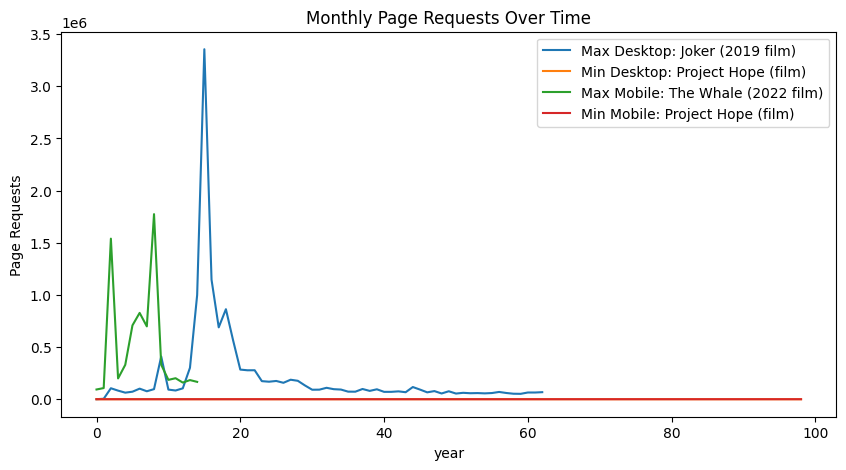

In [114]:
import json
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load data from JSON files
with open('academy_monthly_desktop_start201507-end202309.json', 'r') as file:
    desktop_data = json.load(file)
with open('academy_monthly_mobile_start201507-end202309.json', 'r') as file:
    mobile_data = json.load(file)

# Function to calculate average monthly page requests
def calculate_average(data):
    total_requests = sum(entry['views'] for entry in data)
    return total_requests / len(data)

# Calculate average monthly page requests for each article
desktop_averages = {article: calculate_average(data['items']) for article, data in desktop_data.items()}
mobile_averages = {article: calculate_average(data['items']) for article, data in mobile_data.items()}

# Find articles with highest and lowest average monthly page requests for desktop and mobile
max_desktop_article = max(desktop_averages, key=desktop_averages.get)
min_desktop_article = min(desktop_averages, key=desktop_averages.get)
max_mobile_article = max(mobile_averages, key=mobile_averages.get)
min_mobile_article = min(mobile_averages, key=mobile_averages.get)

# Extract time series data for the selected articles
max_desktop_time_series = [entry['views'] for entry in desktop_data[max_desktop_article]['items']]
min_desktop_time_series = [entry['views'] for entry in desktop_data[min_desktop_article]['items']]
max_mobile_time_series = [entry['views'] for entry in mobile_data[max_mobile_article]['items']]
min_mobile_time_series = [entry['views'] for entry in mobile_data[min_mobile_article]['items']]

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(max_desktop_time_series, label=f'Max Desktop: {max_desktop_article}')
plt.plot(min_desktop_time_series, label=f'Min Desktop: {min_desktop_article}')
plt.plot(max_mobile_time_series, label=f'Max Mobile: {max_mobile_article}')
plt.plot(min_mobile_time_series, label=f'Min Mobile: {min_mobile_article}')



plt.xlabel('year')
plt.ylabel('Page Requests')
plt.title('Monthly Page Requests Over Time')
plt.legend()

plt.show()

Graph 2 - Top 10 Peak Page Views

The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).

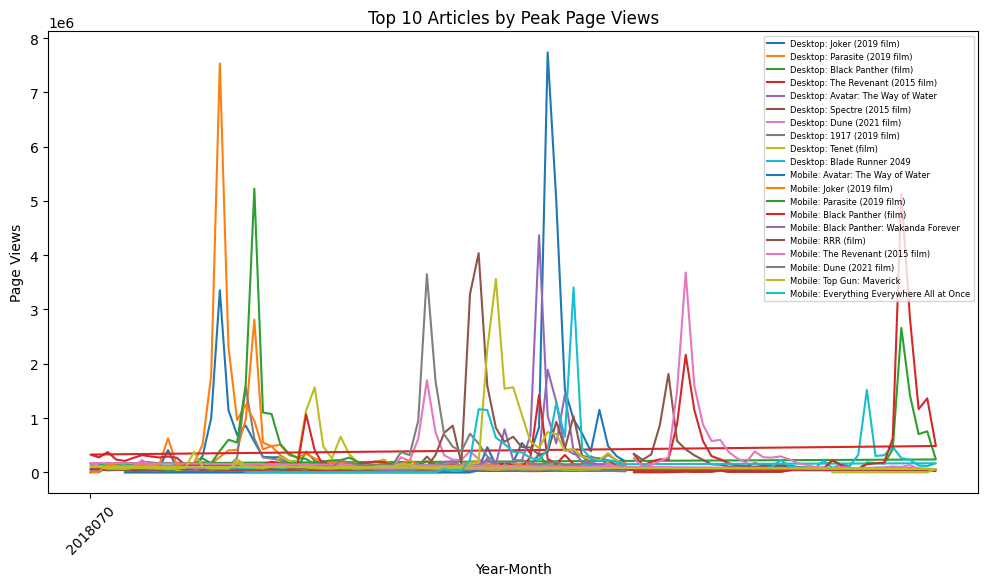

In [119]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Assuming you have the data stored in variables named 'desktop_data' and 'mobile_data'

# Function to find the month with the highest page views for each article
def get_peak_month(data):
    return max(data['items'], key=lambda x: x['views'])['timestamp']

# Find the peak month for each article for desktop and mobile
desktop_peak_months = {article: get_peak_month(data) for article, data in desktop_data.items()}
mobile_peak_months = {article: get_peak_month(data) for article, data in mobile_data.items()}

# Order articles by their peak page views
desktop_sorted_articles = sorted(desktop_peak_months, key=lambda x: max(entry['views'] for entry in desktop_data[x]['items']), reverse=True)
mobile_sorted_articles = sorted(mobile_peak_months, key=lambda x: max(entry['views'] for entry in mobile_data[x]['items']), reverse=True)

# Select the top 10 articles for desktop and top 10 for mobile access
top_desktop_articles = desktop_sorted_articles[:10]
top_mobile_articles = mobile_sorted_articles[:10]

# Plot the time series for top 10 desktop and top 10 mobile articles
plt.figure(figsize=(12, 6))

for article in top_desktop_articles:
    time_series = desktop_data[article]['items']
    views = [entry['views'] for entry in time_series]
    months = [entry['timestamp'][:7] for entry in time_series]  # Extract year and month

    plt.plot(months, views, label=f'Desktop: {article}')

for article in top_mobile_articles:
    time_series = mobile_data[article]['items']
    views = [entry['views'] for entry in time_series]
    months = [entry['timestamp'][:7] for entry in time_series]  # Extract year and month

    plt.plot(months, views, label=f'Mobile: {article}')

plt.xlabel('Year-Month')
plt.ylabel('Page Views')
plt.title('Top 10 Articles by Peak Page Views')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(YearLocator())  # Set major locator to years
plt.legend(fontsize='6')
plt.show()



Graph 3 - Fewest Months of Data

The third graph should show pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. Your graph should show the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

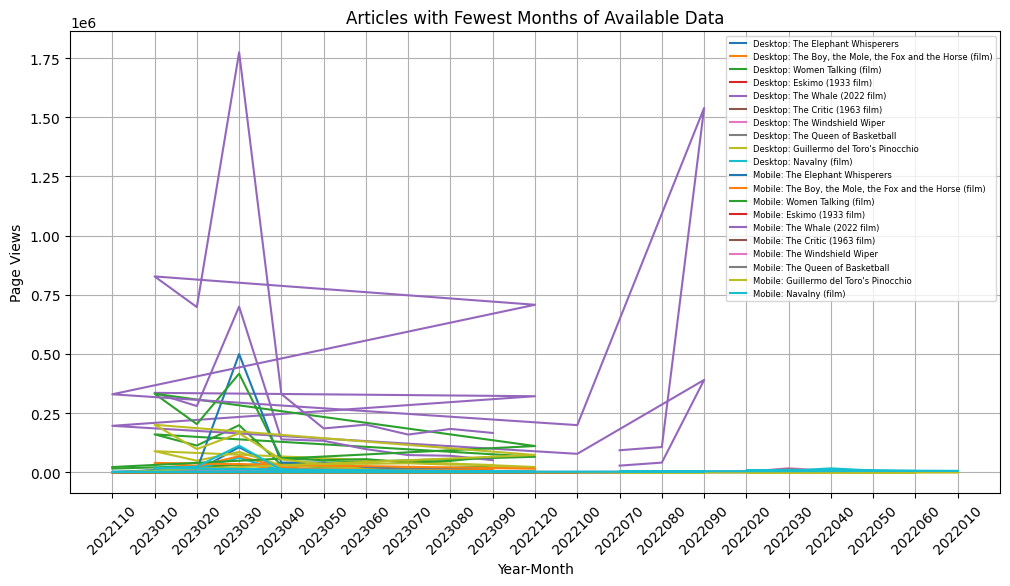

In [118]:
# Load data from JSON files
with open('academy_monthly_desktop_start201507-end202309.json', 'r') as file:
    desktop_data = json.load(file)
with open('academy_monthly_mobile_start201507-end202309.json', 'r') as file:
    mobile_data = json.load(file)

# Function to calculate the number of months for each article
def calculate_num_months(data):
    return len(data['items'])

# Find the number of months for each article for desktop and mobile
desktop_num_months = {article: calculate_num_months(data) for article, data in desktop_data.items()}
mobile_num_months = {article: calculate_num_months(data) for article, data in mobile_data.items()}

# Order articles by the number of months (in ascending order)
desktop_sorted_articles = sorted(desktop_num_months, key=lambda x: desktop_num_months[x])
mobile_sorted_articles = sorted(mobile_num_months, key=lambda x: mobile_num_months[x])

# Select the 10 articles with the fewest months of data for desktop and mobile access
top_desktop_articles = desktop_sorted_articles[:10]
top_mobile_articles = mobile_sorted_articles[:10]

# Plot the time series for top 10 desktop and top 10 mobile articles
plt.figure(figsize=(12, 6))

for article in top_desktop_articles:
    time_series = desktop_data[article]['items']
    views = [entry['views'] for entry in time_series]
    months = [entry['timestamp'][:7] for entry in time_series]  # Extract year and month

    plt.plot(months, views, label=f'Desktop: {article}')

for article in top_mobile_articles:
    time_series = mobile_data[article]['items']
    views = [entry['views'] for entry in time_series]
    months = [entry['timestamp'][:7] for entry in time_series]  # Extract year and month

    plt.plot(months, views, label=f'Mobile: {article}')

plt.xlabel('Year-Month')
plt.ylabel('Page Views')
plt.title('Articles with Fewest Months of Available Data')
plt.xticks(rotation=45)
plt.legend(fontsize='6')
plt.grid(True)
plt.show()

